<a href="https://colab.research.google.com/github/Daruspace/NLP/blob/main/Project_1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/tweet.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [ ]:
! pip install nltk

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [ ]:
# Convert 'tweet' column to string
df['tweet'] = df['tweet'].astype(str)

# Convert 'sentimen' column to categorical type
df['sentimen'] = df['sentimen'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sentimen  1815 non-null   category
 1   tweet     1815 non-null   object  
dtypes: category(1), object(1)
memory usage: 16.2+ KB


In [ ]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords list if not already downloaded
nltk.download('stopwords')

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian')) # Use words instead of get

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning function to the 'tweet' column
df['tweet_clean'] = df['tweet'].apply(clean_text)


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa bersama pak jokowi yuk


In [ ]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Apply stopwords removal function to the 'tweet' column
df['tweet_clean'] = df['tweet_clean'].apply(remove_stopwords)


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar kalo negara dapet penghasilan penghasilan negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga mengedepankan harga bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesiaku 2 perekonomian membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa jokowi yuk


#Text Normalization

##Lemmatization : nlp_id


In [ ]:
! pip install nlp-id


In [ ]:
from nlp_id.lemmatizer import Lemmatizer

def lemmetize_indonesian(text):
    # Create an instance of the stemmer
    lemmatizer = Lemmatizer()
    tokens = text.split()
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmetize_indonesian)

Output streaming akan dipotong hingga 5000 baris terakhir.
Lemmatized Tokens: ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: penting prabowo sandi komitmen turun harga listrik 900 w udah gitu aja dukung si jae ga tuju dukung prabowo sandi tuju aja moga prabowo pimpin tepat janji kampanye ga kayak si jae
Original Tokens: ['jokowi', 'warga', 'papua', 'berhak', 'merasakan', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Text: jokowi warga papua hak rasa harga bbm pulau jawa jkw amin hamterjamin 01ndonesia maju
Original Tokens: ['skill', 'anak', 'bangsa'

In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [ ]:
# Write csv
file_path = 'text_lemmatize.csv'
df.to_csv(file_path, index=False)

##Stemming with Sastrawi

In [ ]:
! pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

def lemmatization_indonesian(text):
    # Create a stemmer for Indonesian
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = text.split()

    # Lemmatization for Indonesian
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmatization_indonesian)


Output streaming akan dipotong hingga 5000 baris terakhir.
Lemmatized Tokens: ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: penting prabowo sandi komitmen turun harga listrik 900 w udah gitu aja dukung si jae ga tuju dukung prabowo sandi tuju aja moga prabowo pimpin tepat janji kampanye ga kayak si jae
Original Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Text: jokowi warga papua hak rasa harga bbm pulau jawa jkw amin hamterjamin 01ndonesia maju
Original Tokens: ['skill', 'anak', 'bangsa', 'harga

In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [ ]:
# Write csv
file_path = 'text_lemmatize_sastrawi.csv'
df.to_csv(file_path, index=False)

#Text Modeling With Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/text_lemmatize_sastrawi.csv')
df.head()

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentimen     1815 non-null   object
 1   tweet        1815 non-null   object
 2   tweet_clean  1815 non-null   object
dtypes: object(3)
memory usage: 42.7+ KB


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [ ]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer
cv_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = cv_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = cv_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv_vectorizer.vocabulary_

{'prabowo': 3931,
 'indonesia': 1898,
 'harga': 1733,
 'bangsa': 498,
 'asing': 399,
 'berita': 629,
 'hoax': 1806,
 'buat': 809,
 'kuasa': 2569,
 'ya': 5329,
 'rockygerung': 4191,
 'batu': 543,
 'langka': 2639,
 'tasbih': 4819,
 'jokowi': 2127,
 'hadiah': 1699,
 'habib': 1689,
 'luthfi': 2779,
 'mercy': 3038,
 'era': 1386,
 'ekonomi': 1338,
 '01': 1,
 'maju': 2814,
 'menang': 2999,
 'total': 5008,
 'debat': 1058,
 'sumatera': 4698,
 'selatan': 4402,
 'asi': 396,
 'games': 1527,
 'dampak': 1031,
 'pd': 3704,
 'langsung': 2641,
 'prediksi': 3952,
 'capai': 875,
 '18': 31,
 'triliun': 5037,
 'hebat': 1756,
 'negara': 3288,
 'ngutang': 3411,
 'bngun': 735,
 'infrastruktur': 1920,
 'udah': 5132,
 'dipake': 1179,
 'masyarakat': 2935,
 'ngeluh': 3360,
 'utang': 5201,
 'bayar': 552,
 'kalo': 2207,
 'dapet': 1036,
 'hasil': 1747,
 'pajak': 3609,
 'yg': 5358,
 'bisikin': 705,
 'cm': 956,
 'mikirin': 3065,
 'putar': 4045,
 'duit': 1296,
 'golong': 1643,
 'sports': 4628,
 'dr': 1270,
 'sekian': 4

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import gensim.downloader as gensim_api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import transformers
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ---------------------------- RANDOM FOREST ----------------------------

# 1. Split the data into training and testing sets
X = vectorized_array
y = numeric_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)

X_train shape: (1452, 5390)
X_test shape: (363, 5390)
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
355 fits failed with the following e

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.5915977961432507


Accuracy: 0.6391184573002755
Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.74      0.67       115
     neutral       0.60      0.70      0.65       118
    positive       0.73      0.49      0.59       130

    accuracy                           0.64       363
   macro avg       0.65      0.64      0.64       363
weighted avg       0.65      0.64      0.63       363

Confusion Matrix:
 [[85 21  9]
 [20 83 15]
 [32 34 64]]


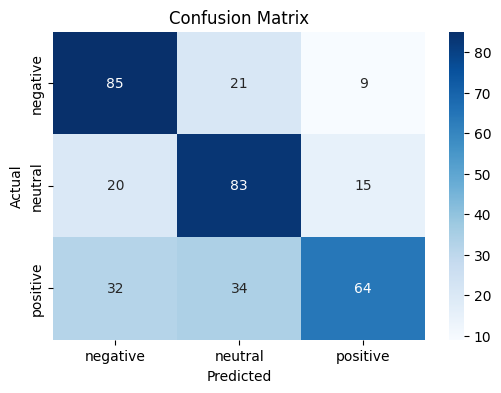

In [ ]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Text Modeling With LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/text_lemmatize_sastrawi.csv')
df.head()

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer
cv_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = cv_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = cv_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# ---------------------------- LSTM ----------------------------
from sklearn.model_selection import train_test_split


# Convert X (decribed in vectorization part) to dense array
X_array = vectorized_array

# Ensure labels are in array format
y = np.array(numeric_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Reshape X_train for LSTM: (samples, time_steps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train shape:", X_train.shape)  # Expected: (samples, features, 1)
print("X_test shape:", X_test.shape)

X_train shape: (1452, 5390, 1)
X_test shape: (363, 5390, 1)


In [ ]:
!pip install scikit-learn
!pip install nlp_id
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [39]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with hyperparameters to tune
def build_lstm_model(hp):
    model = Sequential()

    # LSTM layer with tunable number of units
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),  # (time_steps, features)
        return_sequences=False
    ))

    # Dropout layer with tunable dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer with tunable number of units
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    # Output layer for classification (3 classes)
    model.add(Dense(3, activation='softmax'))

    # Compile the model with tunable optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner with Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='lstm_tuning',
    project_name='countvectorizer_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 25m 38s]
val_accuracy: 0.35395190119743347

Best val_accuracy So Far: 0.36082473397254944
Total elapsed time: 05h 06m 58s
Best Hyperparameters: {'units': 160, 'dropout': 0.4, 'dense_units': 96, 'optimizer': 'rmsprop'}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 160)                 │         103,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │          15,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,427 (466.51 KB)

 Trainable params: 119,427 (466.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 346s 9s/step - accuracy: 0.3344 - loss: 1.0991 - val_accuracy: 0.2955 - val_loss: 1.0997
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 388s 9s/step - accuracy: 0.3589 - loss: 1.0987 - val_accuracy: 0.3540 - val_loss: 1.0985
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 374s 9s/step - accuracy: 0.3226 - loss: 1.0990 - val_accuracy: 0.3540 - val_loss: 1.0990
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 382s 9s/step - accuracy: 0.3459 - loss: 1.0985 - val_accuracy: 0.2955 - val_loss: 1.0988
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 363s 10s/step - accuracy: 0.3496 - loss: 1.0983 - val_accuracy: 0.2990 - val_loss: 1.1001
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step
Test Accuracy: 0.3581267217630854
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       115
     neutral       0.00      0.00      0.00       118
    positive       0.36      1.00      0.53       130

    accuracy                           0.36      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


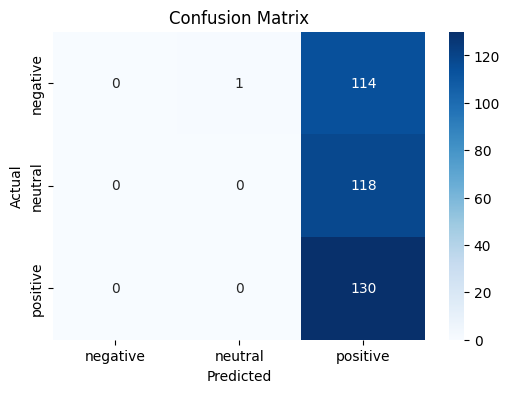

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

## Best Hyperparameters: {'units': 160, 'dropout': 0.4, 'dense_units': 96, 'optimizer': 'adam'}

# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=160,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.4))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=96,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#RF & LSTM With BERT

In [41]:
!pip install transformers torch

In [42]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv('/content/text_lemmatize.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [44]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [45]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = BertModel.from_pretrained('indobenchmark/indobert-base-p1')

def vectorize_text_bert(text, tokenizer, model):
    # Tokenize and convert text to BERT input format
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the mean of the last hidden state as the text representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Vectorize all lemmatized texts
vectorized_texts_bert = np.array([vectorize_text_bert(text, tokenizer, model) for text in df['tweet_clean']])

print("BERT Vectorized Texts Shape:", vectorized_texts_bert.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

BERT Vectorized Texts Shape: (1815, 768)


##Random Forest

In [47]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [48]:
X = vectorized_texts_bert
y = numeric_labels
# Continue with the same Random Forest workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklea

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Score: 0.6308539944903582


Accuracy: 0.6308539944903582
Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.71      0.67       115
     neutral       0.62      0.61      0.62       118
    positive       0.64      0.58      0.60       130

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.63       363
weighted avg       0.63      0.63      0.63       363

Confusion Matrix:
 [[82 19 14]
 [17 72 29]
 [30 25 75]]


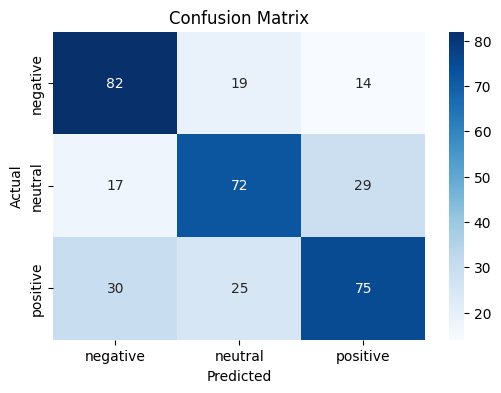

In [49]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##LSTM

In [50]:
!pip install keras-tuner -q

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import LSTM, Dropout, Dense # Import LSTM, Dropout, and Dense
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping


In [52]:
# ---------------------------- LSTM ----------------------------
# Use the same BERT vectorized embeddings as in Random Forest
X = vectorized_texts_bert
y = numeric_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM, but note that since BERT embeddings are static (not sequential),
# you don't need to add an extra dimension like with Word2Vec.
X_train = np.expand_dims(X_train, axis=1)  # Add a dummy "time step" axis
X_test = np.expand_dims(X_test, axis=1)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Define the LSTM model using Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Continue with Keras Tuner for hyperparameter tuning (same as before)
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=20,
    directory='my_tuning',
    project_name='bert_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 00m 10s]
val_accuracy: 0.6769759654998779

Best val_accuracy So Far: 0.7560137510299683
Total elapsed time: 00h 04m 27s
Best Hyperparameters: {'units': 192, 'dropout': 0.2, 'dense_units': 96, 'optimizer': 'adam'}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 92)                  │         316,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 92)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │           8,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 326,067 (1.24 MB)

 Trainable params: 326,067 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.4904 - loss: 0.9960 - val_accuracy: 0.6804 - val_loss: 0.8158
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6427 - loss: 0.8330 - val_accuracy: 0.6976 - val_loss: 0.7469
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6997 - loss: 0.7299 - val_accuracy: 0.6907 - val_loss: 0.7109
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7218 - loss: 0.6856 - val_accuracy: 0.6770 - val_loss: 0.7259
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7355 - loss: 0.6322 - val_accuracy: 0.6014 - val_loss: 0.8921
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7347 - loss: 0.6323 - val_accuracy: 0.7010 - val_loss: 0.7266
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Test Accuracy: 0.650137741046832
Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.78      0.69       115
     neutral       0.69      0.5

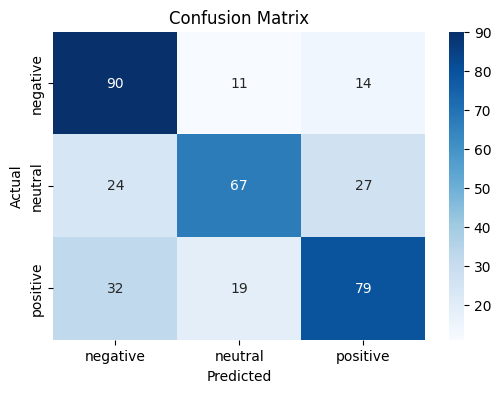

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 192, 'dropout': 0.2, 'dense_units': 96, 'optimizer': 'adam'}
# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=92,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.2))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=96,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()